In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/researchdata/Paper 2_Wear Depth data.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/researchdata/Paper 2_Wear Depth data.xlsx')

In [3]:
df

,Rotation Speed (rpm),Traverse speed (mm/min),Traverse distance (mm),Distance from Shoulder (mm),"Wear depth (average), mm"
0,800.0,30.0,300.0,0.0085,0.244100
1,800.0,30.0,300.0,0.3002,0.286150
2,800.0,30.0,300.0,0.6013,0.319000
3,800.0,30.0,300.0,0.9024,0.328550
4,800.0,30.0,300.0,1.2035,0.361150
...,...,...,...,...,...
236,1000.0,70.0,1000.0,2.7092,0.499550
237,1000.0,70.0,1000.0,3.0009,0.715650
238,1000.0,70.0,1000.0,3.3020,1.032850
239,1000.0,70.0,1000.0,3.5380,1.430650


In [4]:
import matplotlib.pyplot as plt
import plotly_express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [5]:
df.columns

Index(['Rotation Speed (rpm)', 'Traverse speed (mm/min)',
       'Traverse distance (mm)', 'Distance from Shoulder (mm)',
       'Wear depth (average), mm'],
      dtype='object')

# First let's have a overview of relations between various inputs and output

<AxesSubplot:xlabel='Distance from Shoulder (mm)'>

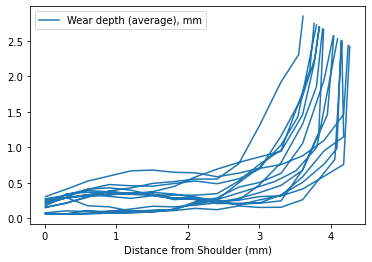

In [6]:
df.plot(x='Distance from Shoulder (mm)', y='Wear depth (average), mm')

# SVM

# KNN 

# Simple ANN using Tensorflow

In [7]:
train_x = df[['Rotation Speed (rpm)', 'Traverse speed (mm/min)',
       'Traverse distance (mm)', 'Distance from Shoulder (mm)']]
train_y = df['Wear depth (average), mm']

In [8]:
train_x["Rotation Speed (rpm)"]

0       800.0
1       800.0
2       800.0
3       800.0
4       800.0
        ...  
236    1000.0
237    1000.0
238    1000.0
239    1000.0
240    1000.0
Name: Rotation Speed (rpm), Length: 241, dtype: float64

In [9]:
train_y.shape

(241,)

In [10]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(1))

2023-01-22 16:31:33.549770: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_x, train_y, epochs=100)

2023-01-22 16:31:33.763043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: nan    
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/100
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 14/100
8/8 